In [1]:
import tensorflow as tf
import os
# 이미지 경로 지정

base_dir = './dataset'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
train_arr = []
validation_arr = []
for train_license_plate in os.listdir(train_dir):
    train_license_plate = os.path.join(train_dir,train_license_plate)
    #print(train_license_plate)
    train_arr.append(train_license_plate)
#print(test)

for validation_license_plate in os.listdir(validation_dir):
    validation_license_plate = os.path.join(validation_dir,validation_license_plate)
    #print(validation_license_plate)
    validation_arr.append(validation_license_plate)

In [ ]:
# 파일 이름과 개수
for i in train_arr:
    print(i)
    train_2207_fnames = os.listdir(i)
    print(train_2207_fnames[:5])

In [2]:
# VGG16 모델 로드
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# VGG16 모델 로드 (include_top=False로 최상위 레이어는 제외)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# 모델의 일부 레이어 동결
for layer in base_model.layers:
    layer.trainable = False

# 카테고리 갯수
classes = len(train_arr)
print(classes)

# 커스텀 레이어 추가
model = Sequential([
    base_model,
    Flatten(),
    Dense(classes, activation='softmax')  # num_classes는 클래스 수에 맞게 설정
])

64


In [8]:
# ResNet50 모델 로드
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ResNet50 모델 로드 (include_top=False로 최상위 레이어는 제외)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# 모델의 일부 레이어 동결
for layer in base_model.layers:
    layer.trainable = False

# 모델 구성
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(classes, activation='softmax')
])


In [3]:
# 모델 컴파일
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.0001),
              loss='categorical_crossentropy',  # 다중 분류에 적합한 손실 함수
              metrics=['accuracy'])  # 정확도는 여전히 평가 지표로 사용됨


In [4]:
# 데이터 증강
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1.0/255.,
    rotation_range=2,         # 회전 각도 범위 설정
    width_shift_range=0.05,     # 가로 이동 범위 설정
    height_shift_range=0.05,    # 세로 이동 범위 설정
    shear_range=0.05,           # 전단 강도 범위 설정
    zoom_range=0.05,            # 확대/축소 범위 설정
    #horizontal_flip=True,      # 수평 반전 여부
    fill_mode='nearest'        # 새로운 픽셀 채우는 방식
)

validation_datagen = ImageDataGenerator(
    rescale=1.0/255.
)

train_generator = train_datagen.flow_from_directory(train_dir, batch_size=32,
                                                    class_mode='categorical', target_size=(150, 150))
validation_generator = validation_datagen.flow_from_directory(validation_dir, batch_size=32,
                                                        class_mode='categorical', target_size=(150, 150))


Found 30438 images belonging to 64 classes.
Found 7578 images belonging to 64 classes.


In [ ]:
# 모델 훈련하기
history = model.fit(train_generator, validation_data=validation_generator,
                    steps_per_epoch=10, epochs=50,
                    validation_steps=10, verbose=1)

# 가중치 저장
model.save('test5.h5')

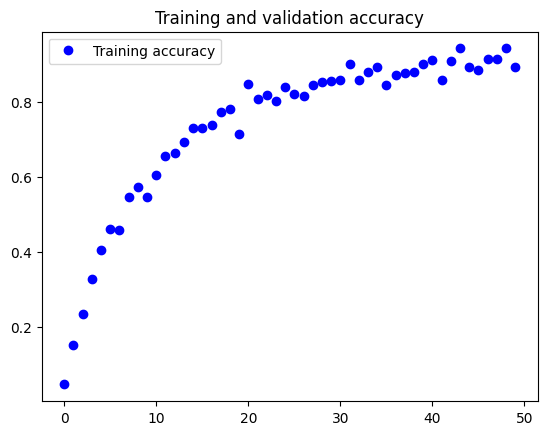

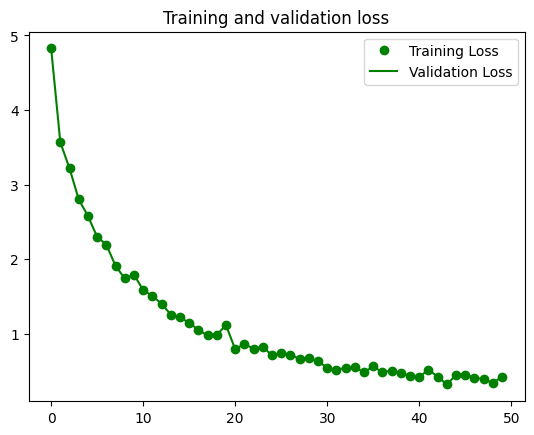

In [6]:
# 정확도와 손실 확인

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
#plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label = 'Training Loss')
plt.plot(epochs, loss, 'g', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()